In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
trades = pd.read_csv("hyperliquid_trades.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

print(trades.head())
print(sentiment.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
trades = pd.read_csv("hyperliquid_trades.csv")
print(trades.head())



                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [20]:
sentiment = pd.read_csv("fear_greed_index.csv")
print(sentiment.head())
print(sentiment.columns)


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [21]:
sentiment = sentiment.rename(columns={
    'date': 'Date',
    'classification': 'Classification'
})

print(sentiment.columns)


Index(['timestamp', 'value', 'Classification', 'Date'], dtype='object')


In [22]:
# Convert trade timestamp (milliseconds → date)
trades['Date'] = pd.to_datetime(trades['Timestamp'], unit='ms').dt.date

# Convert sentiment date
sentiment['Date'] = pd.to_datetime(sentiment['Date']).dt.date


In [23]:
df = pd.merge(
    trades,
    sentiment[['Date', 'Classification', 'value']],
    on='Date',
    how='left'
)

df['Classification'] = df['Classification'].fillna('Unknown')


df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,Greed,74.0


In [24]:
print(df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'Classification', 'value'],
      dtype='object')


In [25]:
df['is_win']  = df['Closed PnL'] > 0
df['is_loss'] = df['Closed PnL'] < 0



In [26]:
df = df.rename(columns={
    'Closed PnL': 'closed_pnl',
    'Size USD': 'size_usd'
})

print(df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'size_usd', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'closed_pnl',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'Classification', 'value', 'is_win', 'is_loss'],
      dtype='object')


In [27]:
# Keep only trades with realized PnL
df_realized = df[df['closed_pnl'] != 0]

print(df_realized.shape)
df_realized.head()


(104408, 21)


,Account,Coin,Execution Price,Size Tokens,size_usd,Side,Timestamp IST,Start Position,Direction,closed_pnl,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification,value,is_win,is_loss
44,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,2446.39,22156.95,SELL,03-12-2024 14:39,10000.498600,Sell,3008.231185,...,52200758791,True,7.754933,5.190000e+14,1.730000e+12,2024-10-27,Greed,74.0,True,False
45,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,25.00,226.43,SELL,03-12-2024 14:39,7554.108602,Sell,30.741534,...,52200758791,True,0.079248,3.350000e+14,1.730000e+12,2024-10-27,Greed,74.0,True,False
46,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0480,33.40,302.20,SELL,03-12-2024 14:39,7529.108602,Sell,40.770089,...,52200758791,True,0.105771,5.140000e+14,1.730000e+12,2024-10-27,Greed,74.0,True,False
47,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0464,200.00,1809.28,SELL,03-12-2024 14:39,7495.708602,Sell,243.812267,...,52200758791,True,0.633248,9.540000e+14,1.730000e+12,2024-10-27,Greed,74.0,True,False
48,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0424,209.26,1892.21,SELL,03-12-2024 14:39,7295.708602,Sell,254.263735,...,52200758791,True,0.662274,7.470000e+14,1.730000e+12,2024-10-27,Greed,74.0,True,False


In [28]:
daily_metrics = (
    df_realized.groupby(['Account', 'Date', 'Classification'])
    .agg(
        trades=('closed_pnl', 'count'),
        win_rate=('is_win', 'mean'),
        total_volume=('size_usd', 'sum'),
        net_pnl=('closed_pnl', 'sum')
    )
    .reset_index()
)

daily_metrics.head()


,Account,Date,Classification,trades,win_rate,total_volume,net_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,139,0.086331,3099549.95,-3.275059e+05
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1593,0.854363,27097971.91,1.927736e+06
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,170,1.000000,427528.10,2.060745e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1927,0.797613,3001445.48,1.709873e+04
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,Unknown,2069,0.732721,2628924.23,1.017915e+04


In [29]:
sentiment_summary = (
    daily_metrics
    .groupby('Classification')
    .agg(
        avg_pnl=('net_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean'),
        avg_volume=('total_volume', 'mean'),
        activity=('trades', 'mean')
    )
    .sort_values('avg_pnl', ascending=False)
)

sentiment_summary


,avg_pnl,avg_win_rate,avg_volume,activity
Classification,,,,
Fear,209372.662205,0.869433,1.086524e+07,2016.750
Greed,113914.876263,0.871128,2.002619e+06,681.250
Extreme Greed,44241.372943,0.672283,4.957295e+06,1083.000
Neutral,19842.797260,0.530949,1.372711e+06,351.500
Unknown,2987.889485,0.785023,6.578677e+06,568.875


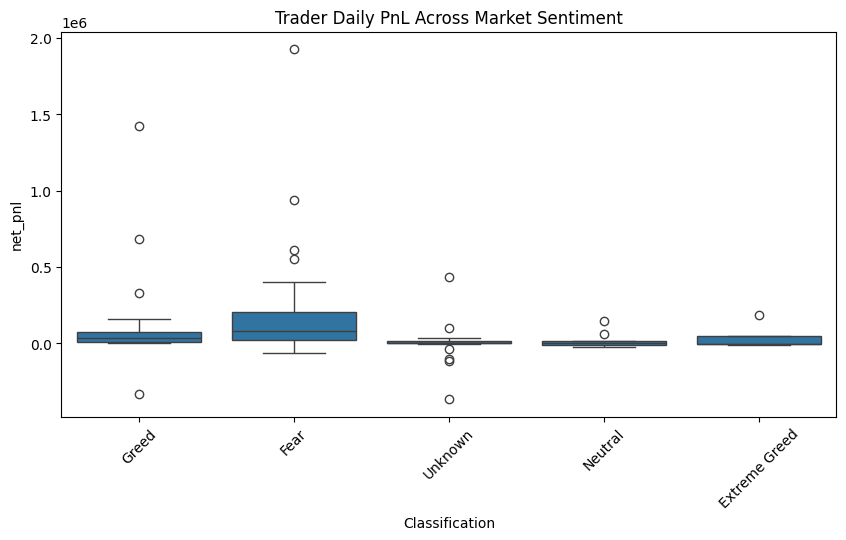

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(
    data=daily_metrics,
    x='Classification',
    y='net_pnl'
)
plt.title("Trader Daily PnL Across Market Sentiment")
plt.xticks(rotation=45)
plt.show()


In [31]:
sentiment_summary = (
    daily_metrics
    .groupby('Classification')
    .agg(
        avg_pnl=('net_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean'),
        avg_volume=('total_volume', 'mean'),
        avg_trades=('trades', 'mean')
    )
    .sort_values('avg_pnl', ascending=False)
)

sentiment_summary


,avg_pnl,avg_win_rate,avg_volume,avg_trades
Classification,,,,
Fear,209372.662205,0.869433,1.086524e+07,2016.750
Greed,113914.876263,0.871128,2.002619e+06,681.250
Extreme Greed,44241.372943,0.672283,4.957295e+06,1083.000
Neutral,19842.797260,0.530949,1.372711e+06,351.500
Unknown,2987.889485,0.785023,6.578677e+06,568.875


In [32]:
volume_threshold = daily_metrics['total_volume'].quantile(0.9)

daily_metrics['trader_type'] = np.where(
    daily_metrics['total_volume'] >= volume_threshold,
    'Whale',
    'Retail'
)


In [33]:
whale_vs_retail = (
    daily_metrics
    .groupby(['Classification', 'trader_type'])
    .agg(
        avg_pnl=('net_pnl', 'mean'),
        avg_win_rate=('win_rate', 'mean'),
        avg_volume=('total_volume', 'mean')
    )
)

whale_vs_retail


avg_pnl  avg_win_rate    avg_volume
Classification trader_type                                           
Extreme Greed  Retail        44241.372943      0.672283  4.957295e+06
Fear           Retail        97671.117382      0.863739  3.063835e+06
               Whale        608306.750861      0.889766  3.872742e+07
Greed          Retail        92083.501337      0.872562  9.818234e+05
               Whale        397722.750304      0.852474  1.527296e+07
Neutral        Retail        19842.797260      0.530949  1.372711e+06
Unknown        Retail       -15878.763451      0.780225  1.171595e+06
               Whale        436920.907007      0.895395  1.309416e+08

In [34]:
pivot = daily_metrics.pivot_table(
    index='Account',
    columns='Classification',
    values='net_pnl',
    aggfunc='mean'
)

pivot['contrarian_score'] = (
    pivot.get('Fear', 0) - pivot.get('Greed', 0)
)

pivot.sort_values('contrarian_score', ascending=False).head(10)


Classification,Extreme Greed,Fear,Greed,Neutral,Unknown,contrarian_score
Account,,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,NaN,1.927736e+06,-327505.900056,NaN,NaN,2.255242e+06
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,NaN,6.133278e+05,61076.167808,NaN,3343.055611,5.522517e+05
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,NaN,3.254420e+05,11671.680000,NaN,-116594.595363,3.137703e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,NaN,3.419454e+05,51737.579418,NaN,9328.490000,2.902079e+05
0x420ab45e0bd8863569a5efbb9c05d91f40624641,NaN,1.834030e+05,16102.568590,NaN,NaN,1.673005e+05
0x4f93fead39b70a1824f981a54d4e55b278e9f760,-7919.471032,2.239684e+05,111230.498007,-25991.506339,7687.978187,1.127379e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,187842.084190,1.362080e+05,37526.331877,0.162720,17518.784011,9.868171e+04
0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,NaN,1.005024e+05,8695.357326,NaN,17381.164000,9.180706e+04
0x8381e6d82f1affd39a336e143e081ef7620a3b7f,NaN,6.451017e+04,11.717676,NaN,991.770272,6.449845e+04


## Final Notes

This analysis demonstrates how market sentiment influences trader behavior and performance.
By aligning sentiment data with high-frequency trade data and focusing on realized PnL,
the results provide actionable insights for risk management and strategy design.
